In [1]:
import qiskit as q
%matplotlib inline

In [5]:
obwod = q.QuantumCircuit(2, 2) # 2 kubity, 2 klasczne bity
obwod.x(0) # x jako NOT. Wartosc poczatkowa to 0, wiec zmienia ja na 1
obwod.cx(0, 1) # CONTRLLED NOT, zmienia druga wartosc kubity, jesli pierwszy kubit to 1
obwod.measure([0, 1], [0, 1]) 
# ([kubit_register], [klasyczny_bit_register]), mierzy kubit 0 i 1 do klasycznych bitow 0 i 1

In [6]:
obwod.draw()    

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

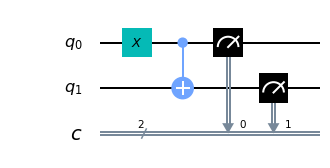

In [9]:
obwod.draw("mpl")

In [16]:
from qiskit import IBMQ

IBMQ.save_account(open("token.txt", "r").read())

configrc.store_credentials:WARNING:2020-05-05 15:54:31,757: Credentials already present. Set overwrite=True to overwrite.


In [18]:
IBMQ.load_account()

IBMQ.providers()

ibmqfactory.load_account:WARNING:2020-05-05 15:55:15,662: Credentials are already in use. The existing account in the session will be replaced.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [31]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        kubit_licz = len(backend.properties().qubits)
    except:
        kubit_licz = "simulated"
        
    print(f"{backend.name()} ma {backend.status().pending_jobs} w kolejce i {kubit_licz} kibitów")

ibmq_qasm_simulator ma 1 w kolejce i simulated kibitów
ibmqx2 ma 1 w kolejce i 5 kibitów
ibmq_16_melbourne ma 5 w kolejce i 15 kibitów
ibmq_vigo ma 2 w kolejce i 5 kibitów
ibmq_ourense ma 1 w kolejce i 5 kibitów
ibmq_london ma 5 w kolejce i 5 kibitów
ibmq_burlington ma 2 w kolejce i 5 kibitów
ibmq_essex ma 1 w kolejce i 5 kibitów
ibmq_armonk ma 1 w kolejce i 1 kibitów
ibmq_athens ma 1 w kolejce i 5 kibitów
ibmq_rome ma 1 w kolejce i 5 kibitów


In [32]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend('ibmq_london')
job = q.execute(obwod, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


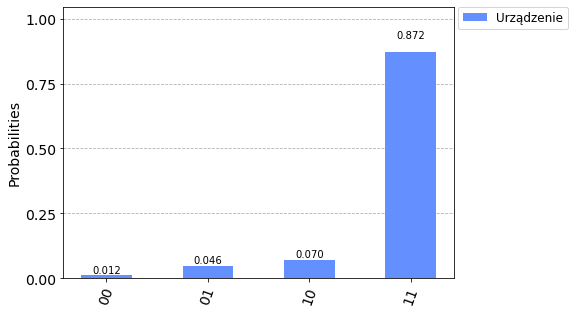

In [35]:
from qiskit.visualization import plot_histogram

rezultat = job.result()
licz = rezultat.get_counts(obwod)

plot_histogram([licz], legend=['Urządzenie'])

In [37]:
obwod2 = q.QuantumCircuit(2, 2)
obwod2.h(0) # bramka Hamarda. umieszcza 0 w superpozycji?
obwod2.cx(0, 1)
obwod2.measure([0, 1], [0, 1])

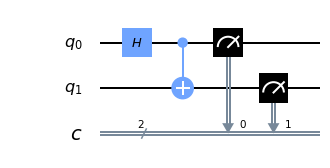

In [38]:
obwod2.draw('mpl')

In [40]:
backend = provider.get_backend('ibmq_london')
job2 = q.execute(obwod2, backend=backend, shots=500)
job_monitor(job2)

Job Status: job has successfully run


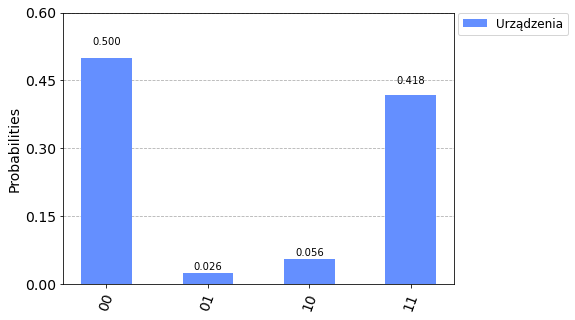

In [41]:
rezultat2 = job2.result()
licz2 = rezultat2.get_counts(obwod2)

plot_histogram([licz2], legend=['Urządzenia'])

In [42]:
from qiskit import Aer # simulator framework

# stworzy WEKTOR STANU (statevector) możliwości
sim_backend = Aer.get_backend('qasm_simulator')

In [45]:
job3 = q.execute(obwod2, backend=sim_backend, shots=500)
job_monitor(job3)

Job Status: job has successfully run


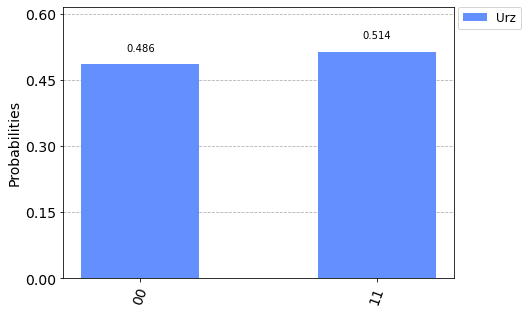

In [46]:
rezultat3 = job3.result()
licz3 = rezultat3.get_counts(obwod2)

plot_histogram([licz3], legend=['Urz'])